In [1]:
mort = read.csv('/Data/common/time_till_death.csv',as.is=TRUE)

In [2]:
head(mort)

subject_id,icustay_id,time_till_death
268,280836,76.45611
269,206613,NA
270,220345,NA
272,210407,NA
273,241507,NA
274,254851,NA


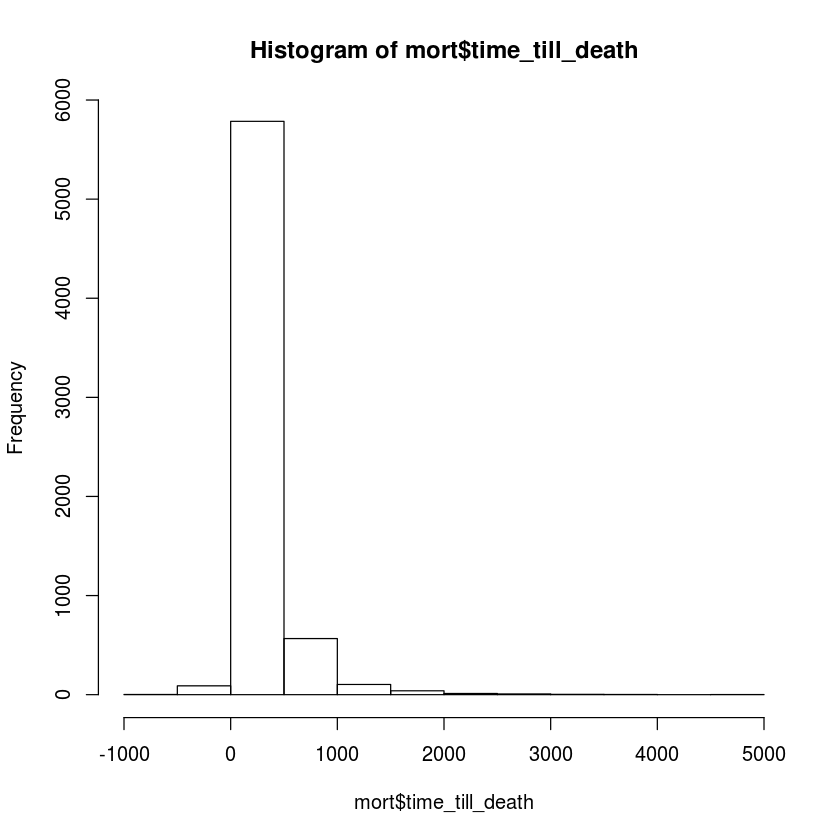

In [3]:
hist(mort$time_till_death)

In [5]:
range(mort$time_till_death,na.rm = TRUE)

[1] -716.7428 4954.1939

In [11]:
death = read.csv('/Data/common/raw_mort.csv',as.is=TRUE)

In [12]:
head(death)

subject_id,icustay_id,intime,deathtime,time_till_death
268,280836,2198-02-14 23:27:38,2198-02-18 03:55:00,76.45611
269,206613,2170-11-05 11:05:29,,NA
270,220345,2128-06-24 15:05:20,,NA
272,210407,2186-12-25 21:08:04,,NA
273,241507,2141-04-19 06:12:05,,NA
274,254851,2114-06-28 22:28:44,,NA


In [18]:
death$icutime = as.POSIXlt(death$intime)

In [23]:
class(death$deathtime)

[1] "character"

In [22]:
str(death)

'data.frame':	61532 obs. of  6 variables:
 $ subject_id     : int  268 269 270 272 273 274 275 277 279 280 ...
 $ icustay_id     : int  280836 206613 220345 210407 241507 254851 219649 272866 204407 247496 ...
 $ intime         : chr  "2198-02-14 23:27:38" "2170-11-05 11:05:29" "2128-06-24 15:05:20" "2186-12-25 21:08:04" ...
 $ deathtime      : chr  "2198-02-18 03:55:00" "" "" "" ...
 $ time_till_death: num  76.5 NA NA NA NA ...
 $ icutime        : POSIXlt, format: "2198-02-14 23:27:38" "2170-11-05 11:05:29" ...


In [24]:
death$deathtime==''

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [28]:
sum(death$deathtime=="")

[1] 54923

In [29]:
dim(death)

[1] 61532     6

In [30]:
death$deathtime[(death$deathtime=="")] = NA

In [31]:
head(death$deathtime)

[1] "2198-02-18 03:55:00" NA                    NA                   
[4] NA                    NA                    NA

In [32]:
temp = as.POSIXlt(death$deathtime)

In [34]:
head(temp)

[1] "2198-02-18 03:55:00 UTC" NA                       
[3] NA                        NA                       
[5] NA                        NA                       

In [36]:
death$morttime = as.POSIXlt(death$deathtime)

In [37]:
head(death)

subject_id,icustay_id,intime,deathtime,time_till_death,icutime,morttime
268,280836,2198-02-14 23:27:38,2198-02-18 03:55:00,76.45611,2198-02-14 23:27:38,2198-02-18 03:55:00
269,206613,2170-11-05 11:05:29,NA,NA,2170-11-05 11:05:29,NA
270,220345,2128-06-24 15:05:20,NA,NA,2128-06-24 15:05:20,NA
272,210407,2186-12-25 21:08:04,NA,NA,2186-12-25 21:08:04,NA
273,241507,2141-04-19 06:12:05,NA,NA,2141-04-19 06:12:05,NA
274,254851,2114-06-28 22:28:44,NA,NA,2114-06-28 22:28:44,NA


In [39]:
death$tmins =  as.numeric(death$morttime - death$icutime)

In [44]:
death$tdays =  (death$tmins)/60/24

In [45]:
summary(death)

   subject_id      icustay_id        intime           deathtime        
 Min.   :    2   Min.   :200001   Length:61532       Length:61532      
 1st Qu.:12048   1st Qu.:224936   Class :character   Class :character  
 Median :24280   Median :249940   Mode  :character   Mode  :character  
 Mean   :33889   Mean   :249963                                        
 3rd Qu.:54192   3rd Qu.:274972                                        
 Max.   :99999   Max.   :299999                                        
                                                                       
 time_till_death      icutime                       morttime                  
 Min.   :-716.74   Min.   :2100-06-07 20:00:22   Min.   :2100-06-19 08:15:00  
 1st Qu.:  38.95   1st Qu.:2126-03-01 09:44:44   1st Qu.:2126-03-04 00:44:00  
 Median : 118.35   Median :2151-01-07 22:00:42   Median :2150-08-29 18:20:00  
 Mean   : 215.69   Mean   :2151-03-20 13:56:55   Mean   :2151-03-12 19:46:33  
 3rd Qu.: 273.07   3rd Qu.:21

In [46]:
demo = read.csv('/Data/common/for_kiesha/demo_k.csv',as.is=TRUE)

In [47]:
demo$icustay_id

[1] 294919 262154 229390 229396 294943 229431 229487 229502 262308 295086
  [11] 262343 295117 229586 229629 229766 262560 229829 262619 229935 229965
  [21] 295569 295621 230144 230205 262975 262981 230266 230269 295808 295816
  [31] 295853 263088 295857 263107 263199 230436 263265 230498 296053 263318
  [41] 263381 296190 263437 296225 230696 296235 296275 296287 230755 230862
  [51] 230885 230963 296538 296675 263919 296702 263944 231209 296779 296782
  [61] 264065 296880 264138 231379 297013 231495 297144 231628 264419 264462
  [71] 264465 231717 231754 297301 264601 231840 264676 297470 264719 231958
  [81] 232015 232068 297603 232142 297685 264926 297767 232264 265101 297877
  [91] 202491 297915 265171 232423 265218 265227 265279 232536 232563 265353
 [101] 298164 298186 265437 298225 265506 298275 298314 232778 298366 232913
 [111] 298456 265689 265700 200191 265732 232988 265809 200290 298607 200325
 [121] 265868 298696 233187 265959 200489 233293 233322 298859 298878 233349
 [131] 233351 266126 233444 233446 200694 299031 299044 299140 299151 299224
 [141] 266529 299321 233792 266570 201077 266615 299386 233856 201098 233872
 [151] 299415 266652 299452 266737 266788 299571 201299 299608 201311 201358
 [161] 201360 266909 299698 234186 299736 201457 201525 201528 201612 299949
 [171] 201665 267226 201715 234562 234574 201821 267383 234617 201868 234698
 [181] 234725 267531 234783 267582 267596 202089 202142 234940 267806 202313
 [191] 267868 235180 202419 202425 267988 267998 202476 268024 268035 235268
 [201] 268044 268125 268150 268249 268316 202837 202907 202967 268509 268542
 [211] 203105 203111 268662 203182 203194 235985 236133 203413 236183 236246
 [221] 269040 236325 236342 203626 269261 203816 269408 236675 203911 236738
 [231] 203979 236757 269543 236823 204055 204061 269597 269612 269623 269667
 [241] 236942 204176 204194 236973 236992 237048 242505 204305 204396 237200
 [251] 204436 237249 270070 237331 204571 237343 204605 270207 237442 270265
 [261] 237521 262135 237544 237570 204829 204863 204882 204903 204924 270489
 [271] 204958 205007 237777 270546 270566 205032 205105 270648 237901 270704
 [281] 270705 249193 270722 237977 238016 205250 205262 238045 205328 238100
 [291] 270962 205429 270983 271038 205508 238322 205605 205638 238523 205771
 [301] 205780 271429 205934 271476 205948 238773 238828 281933 271619 206161
 [311] 238940 238943 271730 206221 206253 239028 239032 239066 271835 271855
 [321] 271862 271877 239205 239239 206506 239280 206577 239360 206662 239441
 [331] 239463 239475 239474 239481 272266 239521 206782 239615 206847 272418
 [341] 272429 272449 206981 272556 239837 239874 272660 239898 272671 272684
 [351] 272694 239955 272786 207346 240145 207403 207431 273068 207533 207539
 [361] 240338 240345 273137 207606 240402 240442 273235 273294 207804 207848
 [371] 240714 240737 240761 208029 240823 273654 273664 208138 273676 273757
 [381] 208222 241001 208241 273868 273939 241177 208409 273981 274003 208509
 [391] 241283 241302 241308 241371 208616 274172 241521 241551 208784 274346
 [401] 241652 208887 241680 241689 274456 208973 241779 209083 209103 209136
 [411] 274688 241960 274764 209280 242062 209333 274899 242178 242205 274991
 [421] 209495 209536 209565 275118 209582 275146 242440 275238 209712 209759
 [431] 242551 209791 242671 209909 275466 242709 242733 275535 242783 210039
 [441] 242881 242884 210153 210185 275725 275732 242972 243033 275864 275879
 [451] 210367 275930 210399 210484 243259 243338 243375 210614 210642 210663
 [461] 210695 243478 210748 276422 210908 276445 243747 210989 276538 276559
 [471] 243804 243812 243820 211068 276614 211116 211134 243949 243996 211313
 [481] 276931 211396 211403 276944 211435 211574 244365 211607 277161 211677
 [491] 211693 211707 277259 244591 211843 244616 277402 244636 277451 211919
 [501] 277498 244746 277520 244767 244787 277574 277581 212059 277618 244869
 [511] 212116 277710 212192 277836 245121 277899 245131 212469 245245 212509

In [50]:
demo$icustay_id %in% death$icustay_id

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [15] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [29] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [43] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [57] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [71] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [85] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [99] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [113] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [127] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [141] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [155] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [169] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [183] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [197] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [211] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [225] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [239] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [253] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [267] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [281] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [295] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [309] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [323] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [337] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [351] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [365] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [379] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [393] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [407] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [421] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [435] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [449] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [463] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [477] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [491] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [505] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [519] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [533] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [547] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [561] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [575] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [589] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [603] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [617] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [631] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [645] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [659] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [673] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [687] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [701] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [715] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [51]:
demo_death = merge(demo,death,by = 'icustay_id')

head(demo_death)

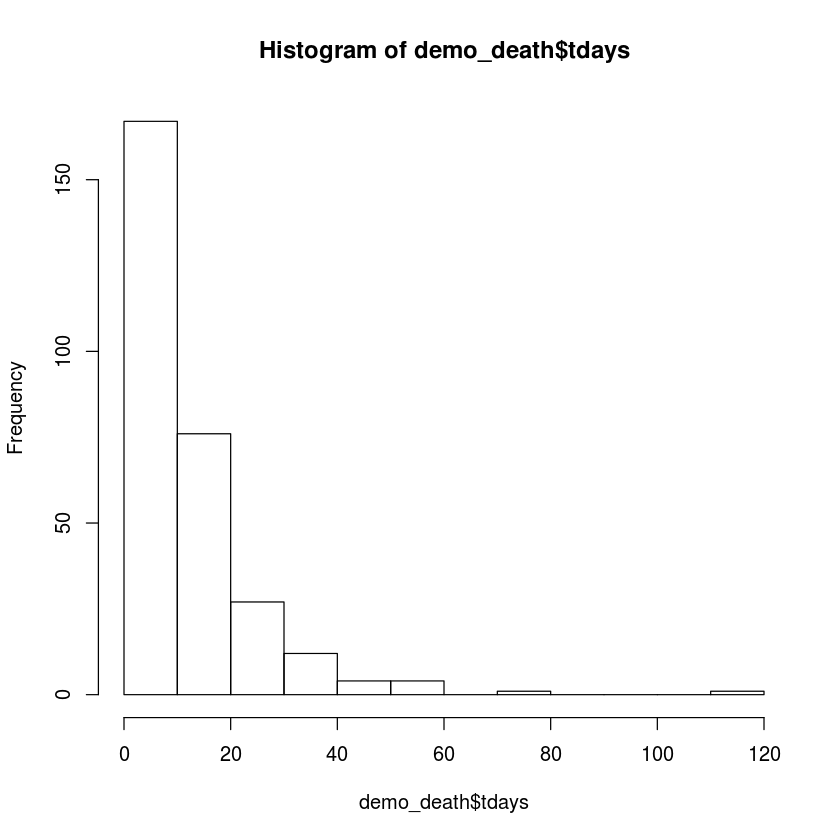

In [54]:
(is.na(demo_death$tdays)

In [57]:
head(mort)


subject_id,icustay_id,time_till_death
268,280836,76.45611
269,206613,NA
270,220345,NA
272,210407,NA
273,241507,NA
274,254851,NA


In [58]:
head(mort_full)

ERROR: Error in head(mort_full): object 'mort_full' not found


In [59]:
mort_full = read.csv('/Data/common/mort_sum_full.csv',as.is=TRUE)

In [60]:
head(mort_full)

subject_id,hadm_id,icustay_id,icu_mort,h_mort,one_mort,thr_mort,six_mort
268,110404,280836,0,1,1,1,1
269,106296,206613,0,0,0,0,0
270,188028,220345,0,0,0,0,0
272,164716,210407,0,0,0,0,0
273,158689,241507,0,0,0,0,0
274,130546,254851,0,0,0,0,0


In [61]:
table(demo_death$h_mort)


  0   1 
813 292 

In [62]:
table(demo_death$icu_mort)


   0 
1105 

In [63]:
elixscore = read.csv('/Data/common/for_kiesha/elixhauser.csv',as.is=TRUE)

In [64]:
head(elixscore)

subject_id,hadm_id,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,hypertension,paralysis,other_neurological,⋯,coagulopathy,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression
58526,100001,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
54610,100003,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9895,100006,0,1,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,1
23018,100007,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
533,100009,0,0,0,0,1,0,0,0,⋯,0,1,0,0,0,1,0,0,0,0
55853,100010,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0


In [65]:
demo_death$subject_id.x - demo_death$subject_id.y

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1037] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1074] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [67]:
which(colnames(demo_death)=='subject_id.y')

[1] 34

In [69]:
colnames(demo_death[,-which(colnames(demo_death)=='subject_id.y')])

[1] "icustay_id"           "age"                  "subject_id.x"        
 [4] "hadm_id"              "admission_type"       "admittime"           
 [7] "dischtime"            "first_hosp_stay"      "first_icu_stay"      
[10] "hospital_expire_flag" "hospstay_seq"         "icustay_seq"         
[13] "intime.x"             "los_hospital"         "los_icu"             
[16] "outtime"              "apsiii"               "apsiii_prob"         
[19] "oasis"                "oasis_prob"           "icu_mort"            
[22] "h_mort"               "one_mort"             "thr_mort"            
[25] "six_mort"             "tv_set"               "gender"              
[28] "ethnicity"            "height"               "pbw"                 
[31] "tv_pbw"               "tv_pbw_observed"      "tv_cat"              
[34] "intime.y"             "deathtime"            "time_till_death"     
[37] "icutime"              "morttime"             "tmins"               
[40] "tdays"

In [70]:
demo_death = (demo_death[,-which(colnames(demo_death)=='subject_id.y')])

In [71]:
head(demo_death)

icustay_id,age,subject_id.x,hadm_id,admission_type,admittime,dischtime,first_hosp_stay,first_icu_stay,hospital_expire_flag,⋯,tv_pbw,tv_pbw_observed,tv_cat,intime.y,deathtime,time_till_death,icutime,morttime,tmins,tdays
200191,62.4176,76012,191578,EMERGENCY,2160-11-18 12:26:00,2160-12-03 18:53:00,Y,Y,0,⋯,5.857607,6.589808,2,2160-11-18 12:27:09,NA,NA,2160-11-18 12:27:09,NA,NA,NA
200290,59.6253,76420,160159,URGENT,2102-12-24 15:52:00,2103-01-12 14:50:00,Y,Y,0,⋯,6.903823,6.928928,2,2102-12-24 15:52:37,NA,NA,2102-12-24 15:52:37,NA,NA,NA
200325,53.0687,82257,161851,EMERGENCY,2142-06-01 22:21:00,2142-08-10 15:00:00,Y,Y,0,⋯,10.989011,11.802198,4,2142-06-01 22:26:17,NA,NA,2142-06-01 22:26:17,NA,NA,NA
200489,68.7234,64819,159799,EMERGENCY,2156-06-09 15:49:00,2156-06-17 15:20:00,Y,Y,0,⋯,11.815223,11.697071,4,2156-06-10 09:54:06,NA,NA,2156-06-10 09:54:06,NA,NA,NA
200694,59.9734,59347,144152,URGENT,2145-01-16 18:59:00,2145-02-24 13:21:00,Y,Y,0,⋯,9.411981,9.830292,3,2145-01-26 04:45:25,NA,NA,2145-01-26 04:45:25,NA,NA,NA
201077,25.9579,57764,103584,EMERGENCY,2126-02-01 21:56:00,2126-05-14 10:23:00,Y,Y,0,⋯,9.394317,10.036262,4,2126-02-01 22:06:22,NA,NA,2126-02-01 22:06:22,NA,NA,NA


In [72]:
which(colnames(demo_death)=='subject_id.y')

integer(0)

In [74]:
which(colnames(demo_death)=='subject_id.x')

[1] 3

In [75]:
colnames(demo_death)[colnames(demo_death)=='subject_id.x']

[1] "subject_id.x"

In [76]:
colnames(demo_death)[colnames(demo_death)=='subject_id.x'] = 'subject_id'

In [77]:
head(elixscore)

subject_id,hadm_id,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,hypertension,paralysis,other_neurological,⋯,coagulopathy,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression
58526,100001,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
54610,100003,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9895,100006,0,1,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,1
23018,100007,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
533,100009,0,0,0,0,1,0,0,0,⋯,0,1,0,0,0,1,0,0,0,0
55853,100010,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0


In [79]:
sum(!(demo_death$subject_id %in% elixscore$subject_id))

[1] 0

In [80]:
demo_death_final = merge(demo_death,elixscore,by = 'subject_id')

In [81]:
head(demo_death_final)

subject_id,icustay_id,age,hadm_id.x,admission_type,admittime,dischtime,first_hosp_stay,first_icu_stay,hospital_expire_flag,⋯,coagulopathy,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression
13316,278742,61.9421,147952,EMERGENCY,2111-12-17 20:57:00,2111-12-30 20:37:00,N,Y,0,⋯,0,0,0,0,0,0,0,0,0,0
13316,278742,61.9421,147952,EMERGENCY,2111-12-17 20:57:00,2111-12-30 20:37:00,N,Y,0,⋯,0,0,0,0,0,0,0,0,0,0
13316,278742,61.9421,147952,EMERGENCY,2111-12-17 20:57:00,2111-12-30 20:37:00,N,Y,0,⋯,0,0,0,1,0,1,0,0,0,0
19569,234783,52.9716,197451,EMERGENCY,2184-03-18 10:59:00,2184-05-13 15:50:00,Y,Y,0,⋯,0,0,0,1,0,0,0,0,0,0
19569,234783,52.9716,197451,EMERGENCY,2184-03-18 10:59:00,2184-05-13 15:50:00,Y,Y,0,⋯,1,0,0,1,0,0,0,0,0,0
19569,234783,52.9716,197451,EMERGENCY,2184-03-18 10:59:00,2184-05-13 15:50:00,Y,Y,0,⋯,1,0,0,1,0,0,0,0,0,0


In [82]:
names(demo_death_final)

[1] "subject_id"               "icustay_id"              
 [3] "age"                      "hadm_id.x"               
 [5] "admission_type"           "admittime"               
 [7] "dischtime"                "first_hosp_stay"         
 [9] "first_icu_stay"           "hospital_expire_flag"    
[11] "hospstay_seq"             "icustay_seq"             
[13] "intime.x"                 "los_hospital"            
[15] "los_icu"                  "outtime"                 
[17] "apsiii"                   "apsiii_prob"             
[19] "oasis"                    "oasis_prob"              
[21] "icu_mort"                 "h_mort"                  
[23] "one_mort"                 "thr_mort"                
[25] "six_mort"                 "tv_set"                  
[27] "gender"                   "ethnicity"               
[29] "height"                   "pbw"                     
[31] "tv_pbw"                   "tv_pbw_observed"         
[33] "tv_cat"                   "intime.y"                
[35] "deathtime"                "time_till_death"         
[37] "icutime"                  "morttime"                
[39] "tmins"                    "tdays"                   
[41] "hadm_id.y"                "congestive_heart_failure"
[43] "cardiac_arrhythmias"      "valvular_disease"        
[45] "pulmonary_circulation"    "peripheral_vascular"     
[47] "hypertension"             "paralysis"               
[49] "other_neurological"       "chronic_pulmonary"       
[51] "diabetes_uncomplicated"   "diabetes_complicated"    
[53] "hypothyroidism"           "renal_failure"           
[55] "liver_disease"            "peptic_ulcer"            
[57] "aids"                     "lymphoma"                
[59] "metastatic_cancer"        "solid_tumor"             
[61] "rheumatoid_arthritis"     "coagulopathy"            
[63] "obesity"                  "weight_loss"             
[65] "fluid_electrolyte"        "blood_loss_anemia"       
[67] "deficiency_anemias"       "alcohol_abuse"           
[69] "drug_abuse"               "psychoses"               
[71] "depression"

In [83]:
write.csv(demo_death_final,'/Data/common/for_kiesha/data_for_survival_temp.csv',row.names<-FALSE)

In [84]:
mean_tv = read.csv('/Data/common/for_kiesha/Ventilator_final_final_table_demo_mort_vent.csv',as.is = TRUE)

In [85]:
head(mean_tv)

icustay_id,age,subject_id,hadm_id,admission_type,admittime,dischtime,first_hosp_stay,first_icu_stay,hospital_expire_flag,⋯,tv_set,tv_pbw,tv_pbw_observed,mean_tv_observed,gender,ethnicity,height,pbw,tv_pbw_mean,chosen
294919,70.8541,86078,182281,EMERGENCY,2183-02-03 21:02:00,2183-02-08 15:00:00,Y,Y,1,⋯,500.0,7.300208,9.315065,520.0345,M,WHITE,172.72,68.4912,7.592720,2
262154,300.0023,94698,152925,EMERGENCY,2105-12-07 10:37:00,2105-12-26 15:30:00,Y,Y,0,⋯,450.0,9.056877,9.479531,383.4815,F,WHITE,157.00,49.6860,7.718099,4
229390,74.7386,71277,189952,EMERGENCY,2120-12-27 16:19:00,2121-01-28 14:15:00,Y,Y,0,⋯,550.0,7.322009,6.656371,540.5000,M,WHITE,180.00,75.1160,7.195538,2
229396,64.3319,88649,135549,EMERGENCY,2125-06-18 17:22:00,2125-06-28 12:45:00,Y,Y,0,⋯,500.1,6.424222,6.333016,589.8710,M,WHITE,183.00,77.8460,7.577409,2
294943,47.5626,82119,150285,EMERGENCY,2114-07-29 20:45:00,2114-08-05 16:28:00,Y,Y,0,⋯,500.0,6.431960,10.020994,504.7857,M,WHITE,182.88,77.7368,6.493523,2
229431,71.4110,65313,169885,ELECTIVE,2101-07-19 07:15:00,2101-07-27 17:00:00,Y,Y,1,⋯,450.0,7.886850,8.552851,527.4390,F,WHITE,165.10,57.0570,9.244072,4


In [88]:
meantv = mean_tv[,c('icustay_id','mean_tv_observed','tv_pbw_mean','chosen')]

In [89]:
demo_death_final = merge(demo_death_final,meantv,by='icustay_id')

In [90]:
head(demo_death_final)

icustay_id,subject_id,age,hadm_id.x,admission_type,admittime,dischtime,first_hosp_stay,first_icu_stay,hospital_expire_flag,⋯,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression,mean_tv_observed,tv_pbw_mean,chosen
200191,76012,62.4176,191578,EMERGENCY,2160-11-18 12:26:00,2160-12-03 18:53:00,Y,Y,0,⋯,1,0,0,0,0,0,0,652.6818,8.688985,3
200191,76012,62.4176,191578,EMERGENCY,2160-11-18 12:26:00,2160-12-03 18:53:00,Y,Y,0,⋯,0,0,0,0,0,0,0,652.6818,8.688985,3
200290,76420,59.6253,160159,URGENT,2102-12-24 15:52:00,2103-01-12 14:50:00,Y,Y,0,⋯,1,0,1,0,0,0,0,507.6889,6.372717,2
200694,59347,59.9734,144152,URGENT,2145-01-16 18:59:00,2145-02-24 13:21:00,Y,Y,0,⋯,0,0,0,0,0,0,0,578.7778,12.105435,2
200694,59347,59.9734,144152,URGENT,2145-01-16 18:59:00,2145-02-24 13:21:00,Y,Y,0,⋯,1,0,0,0,0,0,0,578.7778,12.105435,2
201077,57764,25.9579,103584,EMERGENCY,2126-02-01 21:56:00,2126-05-14 10:23:00,Y,Y,0,⋯,1,0,0,0,0,0,0,486.8462,7.622645,2


In [91]:
pf = read.csv('/Data/common/for_kiesha/PF.csv',as.is=T)

In [92]:
head(pf)

X,icustay_id,charttime,specimen_pred,pao2fio2,peep
1,200001,2181-11-25 19:27:00,ART,NA,NA
2,200001,2181-11-26 11:07:00,ART,NA,NA
3,200001,2181-11-26 17:44:00,ART,NA,NA
4,200001,2181-11-26 18:56:00,ART,NA,NA
5,200001,2181-11-27 01:26:00,ART,NA,NA
6,200001,2181-11-27 12:24:00,ART,NA,NA


In [95]:
dim(pf)

[1] 403909      6

In [96]:
summary(pf$pao2fio2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    2.5   161.7   227.5   245.0   308.0  8300.0   81158 

In [99]:
ventilator_time = read.csv('/Data/common/time48.csv',as.is=T) 

In [100]:
head(ventilator_time)

icustay_id,ventnum,starttime,endtime,duration_hours
200003,1,2199-08-03 18:00:00,2199-08-07 13:00:00,91.00000
200011,1,2188-08-06 01:00:00,2188-08-06 04:00:00,3.00000
200028,1,2133-10-29 18:00:00,2133-10-30 09:04:00,15.06667
200045,1,2116-07-10 15:00:00,2116-07-10 23:00:00,8.00000
200045,2,2116-07-12 07:00:00,2116-07-15 07:10:00,72.16667
200045,3,2116-07-15 18:00:00,2116-07-17 12:00:00,42.00000


In [101]:
sum(!(demo_death_final %in% ventilator_time$icustay_id))

[1] 74

In [102]:
sum(!(demo_death_final$icustay_id %in% ventilator_time$icustay_id))

[1] 0

In [103]:
demo_death_final = merge(demo_death_final,ventilator_time,by = 'icustay_id')

In [104]:
dim(demo_death_final)

[1] 3301   78

In [105]:
demo_death_final = merge(demo_death,elixscore,by = 'subject_id')

In [106]:
demo_death_final1 = merge(demo_death_final,meantv,by='icustay_id')

In [107]:
dim(ventilator_time)

[1] 12761     5

In [108]:
duplicated(ventilator_time$icustay_id)

[1] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE
   [13] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE
   [25]  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE
   [37] FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE
   [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [73]  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE
   [85]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
   [97]  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
  [109]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE
  [121] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE
  [133] FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE
  [145]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
  [157] FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
  [169] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [181] FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE
  [193]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
  [217]  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE
  [229]  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE
  [241]  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265]  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE
  [277]  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
  [289]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE
  [301]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE
  [313] FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE
  [325]  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE
  [349]  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [361]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [373]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
  [385] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE
  [397]  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [409] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
  [421] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [433]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [445]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [457]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
  [469] FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE
  [481] FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
  [493]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [505]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [517]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [529]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [541]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE
  [553] FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE
  [565] FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [577]  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE
  [589]  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
  [6

In [109]:
temp = aggregate(ventilator_time$duration_hours, by=list(ventilator_time$icustay_id), FUN=sum, na.rm=TRUE)

In [110]:
head(temp)

Group.1,x
200003,91.00000
200011,3.00000
200028,15.06667
200045,418.50000
200077,191.33333
200091,50.30000


In [112]:
dim(temp)

[1] 6568    2

colnames(temp)

In [114]:
colnames(temp) = c('icustay_id','hours_vent')

In [115]:
colnames(temp) 

[1] "icustay_id" "hours_vent"

In [117]:
sum(duplicated(temp$icustay_id))

[1] 0

In [119]:
sum(!(temp$icustay_id %in% demo_death_final1$icustay_id))

[1] 5590

In [120]:
demo_death_final2 = merge(demo_death_final1,temp,by = 'icustay_id')

In [121]:
dim(demo_death_final2)

[1] 1347   75

In [122]:
dim(demo_death_final1)

[1] 1347   74

In [123]:
dim(demo_death)

[1] 1105   40

In [124]:
head(elixscore)

subject_id,hadm_id,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,hypertension,paralysis,other_neurological,⋯,coagulopathy,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression
58526,100001,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
54610,100003,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9895,100006,0,1,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,1
23018,100007,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
533,100009,0,0,0,0,1,0,0,0,⋯,0,1,0,0,0,1,0,0,0,0
55853,100010,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0


In [125]:
demo_death1 = merge(demo_death,elixscore,by = 'subject_id')

In [127]:
dim(demo_death)

[1] 1105   40

In [129]:
sum(elixscore$subject_id %in% demo_death$subject_id)

[1] 1511

In [130]:
duplicated(elixscore$subject_id)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [135]:
demo_death1 = merge(demo_death,meantv,by='icustay_id',all.x = TRUE)

In [134]:
dim(demo_death)

[1] 1105   40

In [136]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [147]:
demo_death_1 <- demo_death %>%
    select(-icutime, -morttime) %>%
    left_join(meantv, by = "icustay_id")

In [151]:
demo_death_2 <- demo_death_1 %>%
    left_join(elixscore)

Joining, by = c("subject_id", "hadm_id")


In [153]:
demo_3 <- demo_death_2 %>% 
    left_join(temp)
dim(demo_3)

Joining, by = "icustay_id"


[1] 1105   72

In [155]:
data.table::fwrite(demo_3, "/Data/common/survival_1.csv")

In [156]:
coxph(Surv(demo_3$tdays,demo_3$h_mort) ~ demo_3$chosen+demo_3$gender+demo_3$oasis+ demo_3$hours_vent)

ERROR: Error in coxph(Surv(demo_3$tdays, demo_3$h_mort) ~ demo_3$chosen + demo_3$gender + : could not find function "coxph"


In [157]:
library(survival)

In [159]:
coxph(Surv(demo_3$tdays,demo_3$h_mort) ~ factor(demo_3$chosen)+factor(demo_3$gender)+demo_3$oasis+ demo_3$hours_vent)

Call:
coxph(formula = Surv(demo_3$tdays, demo_3$h_mort) ~ factor(demo_3$chosen) + 
    factor(demo_3$gender) + demo_3$oasis + demo_3$hours_vent)

                            coef exp(coef)  se(coef)     z      p
factor(demo_3$chosen)2 -0.589350  0.554688  0.259072 -2.27  0.023
factor(demo_3$chosen)3 -0.171078  0.842756  0.295577 -0.58  0.563
factor(demo_3$chosen)4 -0.551340  0.576177  0.291276 -1.89  0.058
factor(demo_3$gender)M -0.080025  0.923093  0.137616 -0.58  0.561
demo_3$oasis           -0.003692  0.996315  0.008369 -0.44  0.659
demo_3$hours_vent      -0.004540  0.995471  0.000473 -9.61 <2e-16

Likelihood ratio test=134  on 6 df, p=0
n= 251, number of events= 251 
   (854 observations deleted due to missingness)

In [160]:
elix = read.csv('/Data/common/for_kiesha/elixhauser_PCA.csv',as.is=TRUE)

In [165]:
tail(rownames(elix))

[1] "58971" "58972" "58973" "58974" "58975" "58976"

In [166]:
demo_4 = demo_3 %>% 
    left_join(elix)
dim(demo_3)[]

ERROR: Error: `by` required, because the data sources have no common variables


In [168]:
colnames(elix)[1] = 'subject_id'

In [169]:
demo_4 = demo_3 %>% 
    left_join(elix)
dim(demo_3)

Joining, by = "subject_id"


[1] 1105   72

In [170]:
pf = read.csv('/Data/common/for_kiesha/PF.final.cleaned.csv',as.is=TRUE)

In [171]:
head(pf)

icustay_id,pao2fio2_mean,peep_mean,pao2fio2_max,peep_max,pao2fio2_sd,peep_sd
294919,237.3125,5.00000,34.62961,0.0000000,34.62961,0.0000000
262154,283.1818,5.00000,201.28764,0.0000000,201.28764,0.0000000
229390,269.3003,5.12500,71.60131,0.3535534,71.60131,0.3535534
229396,185.3338,6.00000,86.22399,1.5491933,86.22399,1.5491933
294943,419.8247,6.92500,194.26382,2.5499300,194.26382,2.5499300
229431,498.7011,7.28125,250.31391,1.7270967,250.31391,1.7270967


In [172]:
demo_5 = demo_4 %>% 
    left_join(pf)
dim(demo_5)

Joining, by = "icustay_id"


[1] 1105  108

In [175]:
coxph(Surv(demo_5$tdays,demo_5$h_mort) ~ factor(demo_5$chosen)+factor(demo_5$gender)+demo_5$oasis+ demo_5$pao2fio2_mean+ demo_5$hours_vent)

Call:
coxph(formula = Surv(demo_5$tdays, demo_5$h_mort) ~ factor(demo_5$chosen) + 
    factor(demo_5$gender) + demo_5$oasis + demo_5$pao2fio2_mean + 
    demo_5$hours_vent)

                            coef exp(coef)  se(coef)      z       p
factor(demo_5$chosen)2 -0.355833  0.700590  0.263144  -1.35    0.18
factor(demo_5$chosen)3 -0.023980  0.976305  0.298026  -0.08    0.94
factor(demo_5$chosen)4 -0.331726  0.717684  0.295203  -1.12    0.26
factor(demo_5$gender)M -0.141983  0.867636  0.138354  -1.03    0.30
demo_5$oasis            0.002140  1.002143  0.008212   0.26    0.79
demo_5$pao2fio2_mean   -0.004339  0.995670  0.000997  -4.35 1.3e-05
demo_5$hours_vent      -0.005079  0.994934  0.000501 -10.14 < 2e-16

Likelihood ratio test=155  on 7 df, p=0
n= 251, number of events= 251 
   (854 observations deleted due to missingness)

In [176]:
write.csv(demo_5,'/Data/common/survival_1.csv',row.names=FALSE)

In [179]:
coxph(Surv(demo_5$tdays,demo_5$h_mort) ~ factor(demo_5$chosen)+factor(demo_5$gender)+demo_5$oasis+ demo_5$hours_vent)+factor()

Call:
coxph(formula = Surv(demo_5$tdays, demo_5$h_mort) ~ factor(demo_5$chosen) + 
    factor(demo_5$gender) + demo_5$oasis + demo_5$hours_vent)

                            coef exp(coef)  se(coef)     z      p
factor(demo_5$chosen)2 -0.589350  0.554688  0.259072 -2.27  0.023
factor(demo_5$chosen)3 -0.171078  0.842756  0.295577 -0.58  0.563
factor(demo_5$chosen)4 -0.551340  0.576177  0.291276 -1.89  0.058
factor(demo_5$gender)M -0.080025  0.923093  0.137616 -0.58  0.561
demo_5$oasis           -0.003692  0.996315  0.008369 -0.44  0.659
demo_5$hours_vent      -0.004540  0.995471  0.000473 -9.61 <2e-16

Likelihood ratio test=134  on 6 df, p=0
n= 251, number of events= 251 
   (854 observations deleted due to missingness)

In [180]:
demo_6 <- demo_5  %>%
    mutate(pa_cat = case_when(
        pao2fio2_mean < 100 ~ 1L,
        pao2fio2_mean < 200 ~ 2L,
        pao2fio2_mean < 300 ~ 3L,
        TRUE ~ 4L
    ))

In [211]:
fit = coxph(Surv(demo_6$tdays,demo_6$h_mort) ~
            demo_6$PC1 + factor(demo_6$chosen)+factor(demo_6$gender)+demo_6$oasis+ demo_6$hours_vent)

In [212]:
fit

Call:
coxph(formula = Surv(demo_6$tdays, demo_6$h_mort) ~ demo_6$PC1 + 
    factor(demo_6$chosen) + factor(demo_6$gender) + demo_6$oasis + 
    demo_6$hours_vent)

                            coef exp(coef)  se(coef)     z       p
demo_6$PC1             -0.006147  0.993872  0.234289 -0.03    0.98
factor(demo_6$chosen)2 -0.348010  0.706092  0.449021 -0.78    0.44
factor(demo_6$chosen)3  0.044912  1.045936  0.510382  0.09    0.93
factor(demo_6$chosen)4 -0.198557  0.819913  0.524879 -0.38    0.71
factor(demo_6$gender)M -0.219665  0.802787  0.267135 -0.82    0.41
demo_6$oasis           -0.009043  0.990998  0.019802 -0.46    0.65
demo_6$hours_vent      -0.005649  0.994367  0.000967 -5.84 5.2e-09

Likelihood ratio test=54.8  on 7 df, p=1.65e-09
n= 86, number of events= 86 
   (1019 observations deleted due to missingness)

In [188]:
save(fit, file = "/Data/common/fit.rdata")

In [189]:
save.image(file = '/Data/common/Kieshamodel.Rdata')

In [213]:
fit

Call:
coxph(formula = Surv(demo_6$tdays, demo_6$h_mort) ~ demo_6$PC1 + 
    factor(demo_6$chosen) + factor(demo_6$gender) + demo_6$oasis + 
    demo_6$hours_vent)

                            coef exp(coef)  se(coef)     z       p
demo_6$PC1             -0.006147  0.993872  0.234289 -0.03    0.98
factor(demo_6$chosen)2 -0.348010  0.706092  0.449021 -0.78    0.44
factor(demo_6$chosen)3  0.044912  1.045936  0.510382  0.09    0.93
factor(demo_6$chosen)4 -0.198557  0.819913  0.524879 -0.38    0.71
factor(demo_6$gender)M -0.219665  0.802787  0.267135 -0.82    0.41
demo_6$oasis           -0.009043  0.990998  0.019802 -0.46    0.65
demo_6$hours_vent      -0.005649  0.994367  0.000967 -5.84 5.2e-09

Likelihood ratio test=54.8  on 7 df, p=1.65e-09
n= 86, number of events= 86 
   (1019 observations deleted due to missingness)

In [214]:
fitsum = summary(fit)

In [215]:
fitsum$coefficients

,coef,exp(coef),se(coef),z,Pr(>|z|)
demo_6$PC1,-0.006146715,0.9938721,0.2342893529,-0.02623557,9.790694e-01
factor(demo_6$chosen)2,-0.348009911,0.7060919,0.4490210631,-0.77504139,4.383152e-01
factor(demo_6$chosen)3,0.044911805,1.0459356,0.5103818966,0.08799647,9.298795e-01
factor(demo_6$chosen)4,-0.198556796,0.8199132,0.5248786626,-0.37829085,7.052145e-01
factor(demo_6$gender)M,-0.219665239,0.8027875,0.2671346539,-0.82230154,4.109053e-01
demo_6$oasis,-0.009042627,0.9909981,0.0198019162,-0.45665415,6.479197e-01
demo_6$hours_vent,-0.005649333,0.9943666,0.0009673587,-5.83995694,5.221432e-09


In [216]:
coef <- fitsum$coefficients

In [217]:
coef

,coef,exp(coef),se(coef),z,Pr(>|z|)
demo_6$PC1,-0.006146715,0.9938721,0.2342893529,-0.02623557,9.790694e-01
factor(demo_6$chosen)2,-0.348009911,0.7060919,0.4490210631,-0.77504139,4.383152e-01
factor(demo_6$chosen)3,0.044911805,1.0459356,0.5103818966,0.08799647,9.298795e-01
factor(demo_6$chosen)4,-0.198556796,0.8199132,0.5248786626,-0.37829085,7.052145e-01
factor(demo_6$gender)M,-0.219665239,0.8027875,0.2671346539,-0.82230154,4.109053e-01
demo_6$oasis,-0.009042627,0.9909981,0.0198019162,-0.45665415,6.479197e-01
demo_6$hours_vent,-0.005649333,0.9943666,0.0009673587,-5.83995694,5.221432e-09


In [218]:
str(coef)

 num [1:7, 1:5] -0.00615 -0.34801 0.04491 -0.19856 -0.21967 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:7] "demo_6$PC1" "factor(demo_6$chosen)2" "factor(demo_6$chosen)3" "factor(demo_6$chosen)4" ...
  ..$ : chr [1:5] "coef" "exp(coef)" "se(coef)" "z" ...


In [219]:
beta <- coef[, 1]

In [220]:
hr <- exp(beta)

In [221]:
se <- coef[, 3]

In [222]:
hr

demo_6$PC1 factor(demo_6$chosen)2 factor(demo_6$chosen)3 
             0.9938721              0.7060919              1.0459356 
factor(demo_6$chosen)4 factor(demo_6$gender)M           demo_6$oasis 
             0.8199132              0.8027875              0.9909981 
     demo_6$hours_vent 
             0.9943666

In [223]:
se

demo_6$PC1 factor(demo_6$chosen)2 factor(demo_6$chosen)3 
          0.2342893529           0.4490210631           0.5103818966 
factor(demo_6$chosen)4 factor(demo_6$gender)M           demo_6$oasis 
          0.5248786626           0.2671346539           0.0198019162 
     demo_6$hours_vent 
          0.0009673587

In [231]:
lo <- exp(beta - 1.96 * se)

In [232]:
hi <- exp(beta + 1.96 * se)

In [233]:
lo
hi

demo_6$PC1 factor(demo_6$chosen)2 factor(demo_6$chosen)3 
             0.6279129              0.2928510              0.3846441 
factor(demo_6$chosen)4 factor(demo_6$gender)M           demo_6$oasis 
             0.2930773              0.4755662              0.9532726 
     demo_6$hours_vent 
             0.9924830

demo_6$PC1 factor(demo_6$chosen)2 factor(demo_6$chosen)3 
             1.5731192              1.7024551              2.8441388 
factor(demo_6$chosen)4 factor(demo_6$gender)M           demo_6$oasis 
             2.2937898              1.3551589              1.0302167 
     demo_6$hours_vent 
             0.9962537

In [227]:
hr

demo_6$PC1 factor(demo_6$chosen)2 factor(demo_6$chosen)3 
             0.9938721              0.7060919              1.0459356 
factor(demo_6$chosen)4 factor(demo_6$gender)M           demo_6$oasis 
             0.8199132              0.8027875              0.9909981 
     demo_6$hours_vent 
             0.9943666

In [208]:
names(hr)

[1] "factor(demo_6$chosen)2" "factor(demo_6$chosen)3" "factor(demo_6$chosen)4"
[4] "factor(demo_6$gender)M" "demo_6$oasis"           "demo_6$hours_vent"

In [209]:
coef

,coef,exp(coef),se(coef),z,Pr(>|z|)
factor(demo_6$chosen)2,-0.589350070,0.5546877,0.2590721112,-2.2748495,0.02291496
factor(demo_6$chosen)3,-0.171077554,0.8427562,0.2955765040,-0.5787928,0.56272899
factor(demo_6$chosen)4,-0.551340394,0.5761770,0.2912761220,-1.8928445,0.05837856
factor(demo_6$gender)M,-0.080025160,0.9230931,0.1376163552,-0.5815091,0.56089740
demo_6$oasis,-0.003691888,0.9963149,0.0083690462,-0.4411361,0.65911450
demo_6$hours_vent,-0.004539574,0.9954707,0.0004725626,-9.6062927,0.00000000


In [210]:
names(demo_6)

[1] "icustay_id"               "age"                     
  [3] "subject_id"               "hadm_id"                 
  [5] "admission_type"           "admittime"               
  [7] "dischtime"                "first_hosp_stay"         
  [9] "first_icu_stay"           "hospital_expire_flag"    
 [11] "hospstay_seq"             "icustay_seq"             
 [13] "intime.x"                 "los_hospital"            
 [15] "los_icu"                  "outtime"                 
 [17] "apsiii"                   "apsiii_prob"             
 [19] "oasis"                    "oasis_prob"              
 [21] "icu_mort"                 "h_mort"                  
 [23] "one_mort"                 "thr_mort"                
 [25] "six_mort"                 "tv_set"                  
 [27] "gender"                   "ethnicity"               
 [29] "height"                   "pbw"                     
 [31] "tv_pbw"                   "tv_pbw_observed"         
 [33] "tv_cat"                   "intime.y"                
 [35] "deathtime"                "time_till_death"         
 [37] "tmins"                    "tdays"                   
 [39] "mean_tv_observed"         "tv_pbw_mean"             
 [41] "chosen"                   "congestive_heart_failure"
 [43] "cardiac_arrhythmias"      "valvular_disease"        
 [45] "pulmonary_circulation"    "peripheral_vascular"     
 [47] "hypertension"             "paralysis"               
 [49] "other_neurological"       "chronic_pulmonary"       
 [51] "diabetes_uncomplicated"   "diabetes_complicated"    
 [53] "hypothyroidism"           "renal_failure"           
 [55] "liver_disease"            "peptic_ulcer"            
 [57] "aids"                     "lymphoma"                
 [59] "metastatic_cancer"        "solid_tumor"             
 [61] "rheumatoid_arthritis"     "coagulopathy"            
 [63] "obesity"                  "weight_loss"             
 [65] "fluid_electrolyte"        "blood_loss_anemia"       
 [67] "deficiency_anemias"       "alcohol_abuse"           
 [69] "drug_abuse"               "psychoses"               
 [71] "depression"               "hours_vent"              
 [73] "PC1"                      "PC2"                     
 [75] "PC3"                      "PC4"                     
 [77] "PC5"                      "PC6"                     
 [79] "PC7"                      "PC8"                     
 [81] "PC9"                      "PC10"                    
 [83] "PC11"                     "PC12"                    
 [85] "PC13"                     "PC14"                    
 [87] "PC15"                     "PC16"                    
 [89] "PC17"                     "PC18"                    
 [91] "PC19"                     "PC20"                    
 [93] "PC21"                     "PC22"                    
 [95] "PC23"                     "PC24"                    
 [97] "PC25"                     "PC26"                    
 [99] "PC27"                     "PC28"                    
[101] "PC29"                     "PC30"                    
[103] "pao2fio2_mean"            "peep_mean"               
[105] "pao2fio2_max"             "peep_max"                
[107] "pao2fio2_sd"              "peep_sd"                 
[109] "pa_cat"

Call:
coxph(formula = Surv(demo_6$tdays, demo_6$h_mort) ~ demo_6$PC1 + 
    factor(demo_6$chosen) + factor(demo_6$gender) + demo_6$oasis + 
    demo_6$hours_vent)

  n= 86, number of events= 86 
   (1019 observations deleted due to missingness)

                             coef  exp(coef)   se(coef)      z Pr(>|z|)    
demo_6$PC1             -0.0061467  0.9938721  0.2342894 -0.026    0.979    
factor(demo_6$chosen)2 -0.3480099  0.7060919  0.4490211 -0.775    0.438    
factor(demo_6$chosen)3  0.0449118  1.0459356  0.5103819  0.088    0.930    
factor(demo_6$chosen)4 -0.1985568  0.8199132  0.5248787 -0.378    0.705    
factor(demo_6$gender)M -0.2196652  0.8027875  0.2671347 -0.822    0.411    
demo_6$oasis           -0.0090426  0.9909981  0.0198019 -0.457    0.648    
demo_6$hours_vent      -0.0056493  0.9943666  0.0009674 -5.840 5.22e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                       exp(coef) exp(-coef) lower .95 upper .95
demo_6$PC1    